Internet Resources:

[handson-ml/06_decision_trees.ipynb](https://github.com/ageron/handson-ml/blob/master/06_decision_trees.ipynb)  

As the name implies, this model will create a decision tree that best fits to the training data. Here's an example of a descision tree:

![](https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg)

Descision trees are easy to train and understand but are prone to overfitting.

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# data set is the iris dataset from https://www.kaggle.com/arshid/iris-flower-dataset
# we are only keeping features "petal_length" and "petal_width"
#df = pd.read_csv("data/iris.csv").drop(["sepal_width", "sepal_length"], 1) 

df = pd.read_csv('data/breast-cancer-wisconsin.data') # data from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

# prepare data
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

'''
# convert labels to numbers
label_mappings = {label_str:i for i,label_str in enumerate(df["species"].unique())}
df.replace({"species":label_mappings}, inplace=True)

X = np.array(df.drop(["species"], 1))
y = np.array(df["species"])
'''

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

# max_depth = maximum depth of the tree. this prevents to much overfittin
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) 
tree_clf.fit(X, y)
#print(tree_clf.predict([[3,2]]))
df



depths = [i*2+1 for i in range(10)]
print(depths)

for depth in depths:
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42) 
    tree_clf.fit(x_train, y_train)
    accuracy = tree_clf.score(x_test, y_test)
    print(depth, round(accuracy, 5))
    
    
    

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
1 0.90714
3 0.92857
5 0.94286
7 0.94286
9 0.93571
11 0.93571
13 0.93571
15 0.93571
17 0.93571
19 0.93571


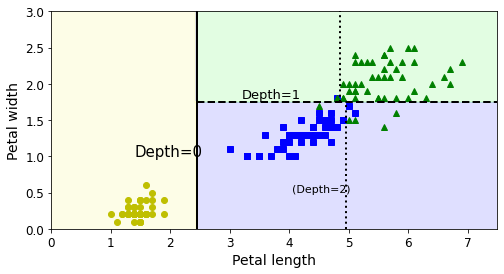

In [2]:
                                        # x: 0-7.5, y: 0-3
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 101)
    x2s = np.linspace(axes[2], axes[3], 101)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()] # ravel makes flat
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()